# Importing matlab files into MNE environment

Data structure-  

3D MATLAB structure: 

[channels [x] samples [x] trials]

Label info: 

- Y = 1 => Foot movement imagery

- Y = 2 => Left hand imagery

- Y = 3 => Right hand imagery

- Y = 4 => Rest

Reference video: 

https://www.youtube.com/watch?v=4eJlkvwNT2U


Further info:

- trial duration = 3 seconds 
- sampling frequency = 256
- 32 channels 

In [56]:
%matplotlib inline
import numpy as np

from scipy.io import loadmat 
import mne, glob 

In [57]:
# find the matfiles in the current directory 
matfiles = glob.glob('*.mat')

data = {}
matfiles

['s(1).mat', 's(5).mat', 's(6).mat', 's(7).mat']

## Load matlab

In [58]:
dat = loadmat(matfiles[1])

# channels x time x trials
X = dat['X']
Y = dat['Y']    

In [4]:
X.shape

(32, 768, 1291)

In [60]:
Y.shape

(1291, 4)

In [61]:
Y[:10,:]

array([[-1., -1., -1.,  1.],
       [-1., -1., -1.,  1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -1.],
       [-1., -1., -1.,  1.],
       [-1., -1., -1.,  1.]], dtype=float32)

In [62]:
loc, ind = np.where(Y>0)

In [63]:
np.unique(ind)

array([0, 1, 2, 3], dtype=int64)

In [64]:
labels = ind + 1

In [66]:
labels

array([4, 4, 1, ..., 2, 3, 1], dtype=int64)

In [67]:
labels.shape

(1291,)

In [68]:
data = np.rollaxis(X, 2, 0)  
data.shape

(1291, 32, 768)

### channel names

In [12]:
chan_names = ["Fp1", "AF3","F7","F3","FC1","FC5","T7","C3","CP1","CP5","P7","P3","Pz", 
              "PO3", "O1","Oz","O2","PO4","P4","P8","P6","CP2","C4", "T8","FC6","FC2",
              "F4",  "F8","AF4","Fp2","Fz","Cz"] 

In [69]:
event_id = dict(Foot = 1, Left_Hand = 2, Right_Hand = 3, Rest = 4)

In [70]:
sfreq = 256

## Create MNE structure

In [72]:
"""We need the following information to create MNE structure:
    data ([ndarray]): [trials x chans x samples]
    y ([ndarray]):    [class label array  [1, labels]]
    sfreq ([int]):    [sampling frequency]
    event_id ([dict]): [{1 :'pos', -1 : 'neg'} - class labels id]
    chan_names ([list]): [channel names in a list of strings]
"""                     
   

n_channels = len(data[1,:,1])

# Initialize an info structure
info = mne.create_info(
        ch_names = chan_names,
        ch_types = ['eeg']*n_channels,
        sfreq    = sfreq 
        )   

info.set_montage('standard_1020')
print('Event created :', info)    

Event created : <Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 256.0 Hz
>


In [73]:
# Create an event matrix: events with alternating event codes
eventLength = Y.shape[0]
ev = [i*sfreq*3 for i in range(eventLength)]

### MNE events
the events array should contain the following information
[sample onsets, zeros, labels]

In [74]:
events = np.column_stack((np.array(ev),
                          np.zeros(eventLength,  dtype = int),
                          np.array(labels)))

In [77]:
events

array([[     0,      0,      4],
       [   768,      0,      4],
       [  1536,      0,      1],
       ...,
       [989184,      0,      2],
       [989952,      0,      3],
       [990720,      0,      1]], dtype=int64)

In [78]:
X.shape

(32, 768, 1291)

In [79]:
event_id

{'Foot': 1, 'Left_Hand': 2, 'Right_Hand': 3, 'Rest': 4}

In [80]:
tmin = 0

In [81]:
tmin = 0                
        # Create the :class:`mne.EpochsArray` object
epochs = mne.EpochsArray(data, info, events, tmin, event_id)

Not setting metadata
Not setting metadata
1291 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


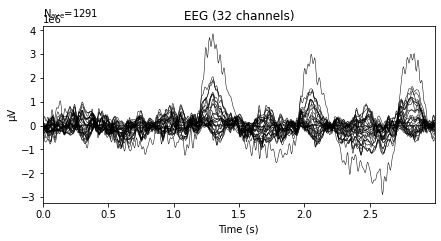

In [84]:
# quick visualization 
epochs.average().plot();

#### LOAD all files and save as MNE epochs 

    Using multitaper spectrum estimation with 7 DPSS windows


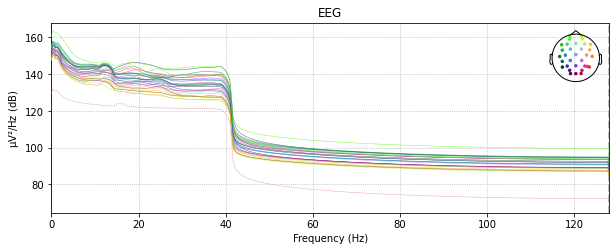

In [85]:
epochs.plot_psd();

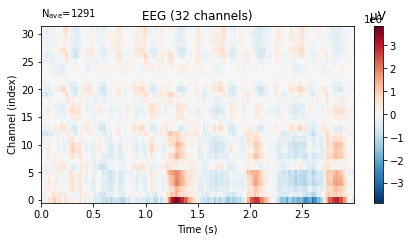

In [86]:
epochs.average().plot_image();

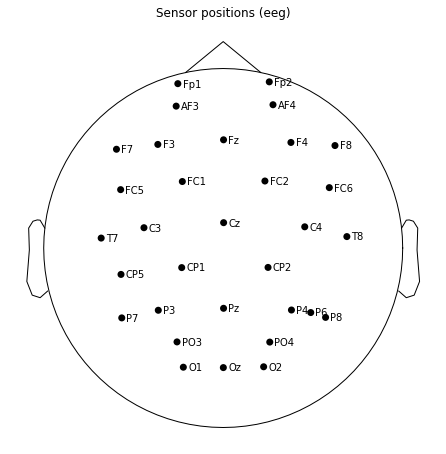

In [87]:
epochs.plot_sensors(show_names=True);

In [88]:
epochs

<EpochsArray |  1291 events (all good), 0 - 2.99609 sec, baseline off, ~242.1 MB, data loaded,
 'Foot': 324
 'Left_Hand': 322
 'Rest': 334
 'Right_Hand': 311>

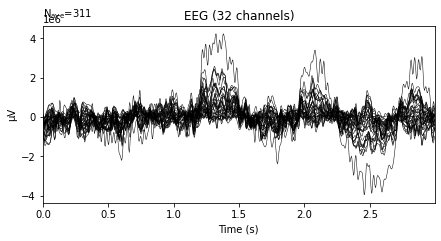

In [96]:
epochs['Right_Hand'].average().plot();